In [52]:
import torch
import matplotlib.pyplot as plt

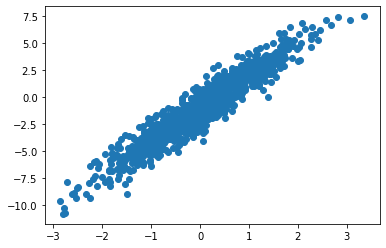

In [53]:
w_true = 3
b_true = -1


def create_data(size):
    x = torch.normal(0, 1, size=(size,))
    y = w_true * x + b_true + torch.normal(0, 1, size=(size,))
    return x, y


x, y = create_data(1000)

plt.scatter(x, y)

In [54]:
w = torch.normal(0, 0.01, size=(1,), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [55]:
trainer = torch.optim.SGD([w, b], lr=0.01)

In [56]:
from torch.utils import data
"""
使用pytorch的sgd，一定要用它的DataLoader，否则计算梯度时，不会除以batch_size
"""
def loss(w, b, x, y):
    return ((y - (w * x + b)) ** 2).sum()

data_iter = data.DataLoader(data.TensorDataset(*(x, y)), batch_size=20, shuffle=True)

for epoch in range(3):
    for x,y in data_iter:
        trainer.zero_grad()
        l = loss(w, b, x, y)
        l.backward()
        trainer.step()
print(w, b)

tensor([3.0271], requires_grad=True) tensor([-1.0110], requires_grad=True)
